In [1]:
%load_ext autoreload
%autoreload 2

import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ib_insync import *
import os
import sys

from optopus.ib_adapter import IBBrokerAdapter
from optopus.optopus import Optopus
from optopus.utils import to_df


%matplotlib inline

2018-11-04 10:36:20,541 — optopus — INFO — Completed configuring the logger


http://conorsvensson.com/2014/11/24/volatility-cones-a-secret-weapon-in-options-trading/

In [2]:
# port = 7497 TWS paper trading
util.startLoop()
opt = Optopus(IBBrokerAdapter(IB(), host='127.0.0.1', port=7497, client=6))
opt.start()

2018-11-04 10:36:38,772 — optopus.optopus — INFO — System started


INFO:optopus.optopus:System started


In [3]:
df = to_df(opt.etfs.values())

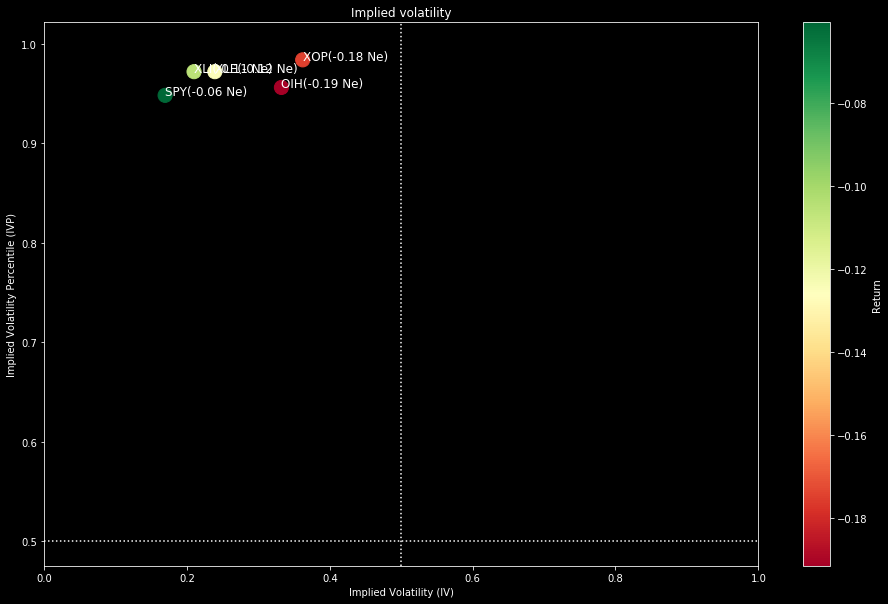

In [4]:
#ax = df.plot(kind='scatter', x='IV_h', y='IV_percentile_h', c='one_month_return', colormap='RdYlGn', s=200, figsize=(14,8))
plt.style.use('dark_background')
plt.figure(figsize=(16, 10))
sc = plt.scatter(x=df['iv'].values, y=df['iv_percentile'].values, c=df['price_pct'].values, cmap='RdYlGn', s=200)
plt.colorbar(sc).set_label('Return')
plt.title('Implied volatility')
plt.xlabel('Implied Volatility (IV)')
plt.ylabel('Implied Volatility Percentile (IVP)')
plt.xlim(0, 1)
plt.axvline(0.5, linestyle='dotted')
plt.axhline(0.5, linestyle='dotted')
for i, row in df.iterrows():
    label = row['code'] + '({0:.2f} {1})'.format(row['price_pct'], row['directional_assumption'][0:2])
    plt.annotate(label, (row['iv'], row['iv_percentile']), fontsize=12)

In [5]:
df[['code', 'correlation']].sort_values(['correlation'], ascending=False).style.background_gradient(cmap='RdYlGn')

,code,correlation
0,SPY,1
2,XLI,0.875255
3,XLE,0.685048
1,XOP,0.595495
4,OIH,0.55551


In [6]:
candidates = df[(df['iv_percentile'] > 0.8)  & (df['iv'] > 0.2) & (df['price_pct'] < -0.1)]
candidates[['code', 'iv_percentile', 'iv', 'iv_pct', 'price_pct', 'price_percentile', 'correlation', 'market_price', 'directional_assumption']].sort_values(['iv_percentile', 'iv'], ascending=[False, False])

,code,iv_percentile,iv,iv_pct,price_pct,price_percentile,correlation,market_price,directional_assumption
1,XOP,0.984127,0.362082,0.314412,-0.175103,0.373016,0.595495,36.78,Neutral
3,XLE,0.972222,0.239102,0.468461,-0.124530,0.222222,0.685048,67.73,Neutral
2,XLI,0.972222,0.209972,0.498980,-0.105243,0.095238,0.875255,71.11,Neutral
4,OIH,0.956349,0.332317,0.314619,-0.191481,0.023810,0.555510,20.72,Neutral


In [7]:
code='XLE'

In [8]:
price_bars = opt.price_history(code)

In [9]:
prices = [b.close for b in price_bars.values]
dates = [b.time for b in price_bars.values]

In [11]:
rsi= opt.rsi_history(code)
rsi_sma = opt.rsi_sma_history(code)
sma1 = opt.sma1_history(code)
sma2 = opt.sma2_history(code)

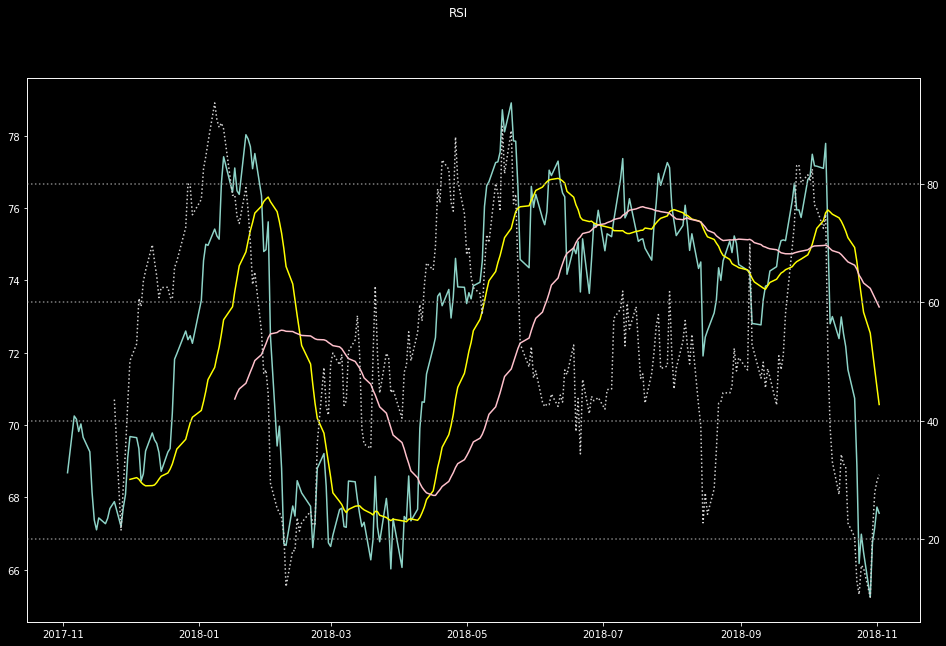

In [17]:
fig, ax1 = plt.subplots(figsize=(16, 10))
fig.suptitle('RSI')
ax1.plot(dates, prices)
ax2 = ax1.twinx()
ax2.plot(dates, rsi, linestyle='dotted', color='lightgray')
#ax2.plot(dates, rsi_sma, linestyle='dotted', color='gray')
ax1.plot(dates, sma1, color='yellow')
#ax4 = ax1.twinx()
ax1.plot(dates, sma2, color='pink')


ax2.axhline(80, linestyle='dotted', color='gray')
ax2.axhline(20, linestyle='dotted', color='gray')
ax2.axhline(60, linestyle='dotted', color='gray')
ax2.axhline(40, linestyle='dotted', color='gray')

In [ ]:
#f, ax = plt.subplots(2, sharex=True, figsize=(16, 10))
#f.suptitle('RSI')
#ax[0].plot(dates, prices)
#ax[1].plot(dates, rsi)
#ax[1].axhline(80, linestyle='dotted', color='red')
#ax[1].axhline(20, linestyle='dotted', color='red')